@software{Alireza_Soroudi_PyomoOptimization,
author = {Alireza Soroudi, Alireza},
license = {MIT},
title = {{PyomoOptimization}},
url = {https://github.com/OptimizationExpert/Pyomo}
}

The required packages are imported 

In [1]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import random 
import math
import networkx as nx
import pandas as pd

In [2]:
egg_names = ['Ava', 
'Ethan',
'Lily',
'Noah',
'Sophia',
'Oliver',
'Mia', 
'William', 'Harper']

In [3]:
vec = {1:[3,5,8], 2:[5,9], 3:[4,5], 4:[1,5],  5:[1,6],  6:[1,9],  7:[3,8],  8:[9,7]   }
connect = []
for k,V in vec.items():
    connect+=[(k,v) for v in V]
print(len(connect))
connect

17


[(1, 3),
 (1, 5),
 (1, 8),
 (2, 5),
 (2, 9),
 (3, 4),
 (3, 5),
 (4, 1),
 (4, 5),
 (5, 1),
 (5, 6),
 (6, 1),
 (6, 9),
 (7, 3),
 (7, 8),
 (8, 9),
 (8, 7)]

The sample input data is generated in this cell

In [4]:
N = 9

model = AbstractModel()
model.i = RangeSet(N)
model.j = Set(initialize= model.i)
model.n = RangeSet(N)
model.m = Set(initialize= model.n)

model.U = Var(model.n,model.i,initialize = 0, within=Binary)
model.L = Var(model.n,bounds=(1,N), within=Reals)
model.x = Var(model.n, model.m, within=Binary)

def Rule_C1(model,n):
    return sum(model.U[n,i] for i in model.i) == 1
model.C1=Constraint(model.n, rule=Rule_C1)

def Rule_C2(model,i):
    return sum(model.U[n,i] for n in model.n) == 1
model.C2=Constraint(model.i, rule=Rule_C2)

def Rule_C3(model,n):
    return sum(i*model.U[n,i] for i in model.i) == model.L[n]
model.C3=Constraint(model.n, rule=Rule_C3)

def Rule_C4A(model,n,m):
    if (n,m) in connect:
        return model.L[n]-model.L[m] <= 1 + N*(1-model.x[n,m])
    else:
        return Constraint.Skip
model.C4A=Constraint(model.n,model.m, rule=Rule_C4A)

def Rule_C4B(model,n,m):
    if (n,m) in connect:
        return -(model.L[n]-model.L[m]) <= 1 + N*(1-model.x[n,m])
    else:
        return Constraint.Skip
model.C4B=Constraint(model.n,model.m, rule=Rule_C4B)

def rule_OF(model):
    return sum(model.x[n,m] for n in model.n for m in model.m if (n,m) in connect)
model.obj = Objective(rule=rule_OF, sense=maximize)

In [5]:
"""
create an instance of the model
"""
instance = model.create_instance()  

In [6]:
from pyomo import environ as pe
import os
os.environ['NEOS_EMAIL'] = 'x@gmail.com' 
#opt = pe.SolverManagerFactory('neos')
#results = opt.solve(instance, solver = "cplex")
opt = pe.SolverFactory('cbc')
opt.options = {'sec': 20000, 'threads': 6, 'ratioGap': 0.02}

results = opt.solve(instance)

print(value(instance.obj))

10.0


In [7]:
for n in instance.n:
    print(n, value(instance.L[n]))


1 6.0
2 9.0
3 3.0
4 4.0
5 5.0
6 7.0
7 2.0
8 1.0
9 8.0


2 1
4 2
9 3
1 4
7 5
6 6
8 7
3 8
5 9
1
9 1
3 2
1 3
7 4
2 5
4 6
8 7
6 8
5 9
2
6 1
9 2
5 3
3 4
7 5
4 6
8 7
2 8
1 9
3
2 1
5 2
1 3
9 4
7 5
4 6
6 7
3 8
8 9
3
3 1
2 2
9 3
6 4
7 5
8 6
5 7
4 8
1 9
6
9 1
8 2
5 3
3 4
7 5
1 6
4 7
2 8
6 9
4
5 1
8 2
1 3
6 4
2 5
9 6
7 7
3 8
4 9
5
3 1
5 2
4 3
2 4
9 5
6 6
8 7
1 8
7 9
5
2 1
7 2
8 3
6 4
1 5
4 6
3 7
5 8
9 9
6
6 1
8 2
9 3
3 4
1 5
4 6
7 7
2 8
5 9
4


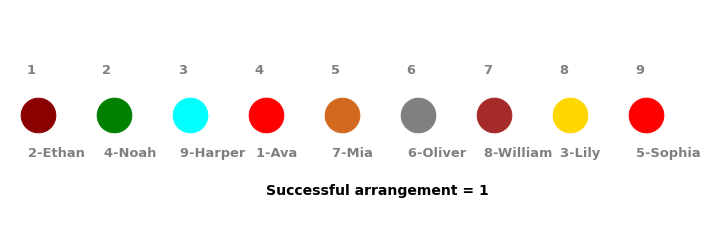

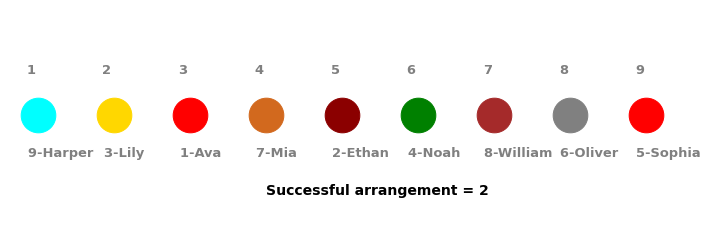

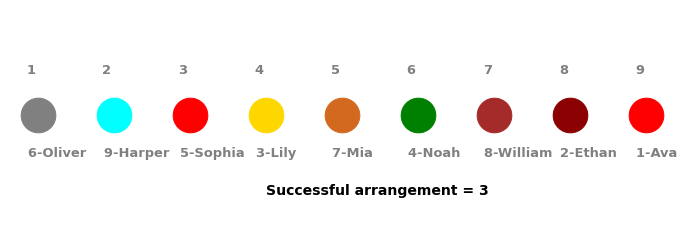

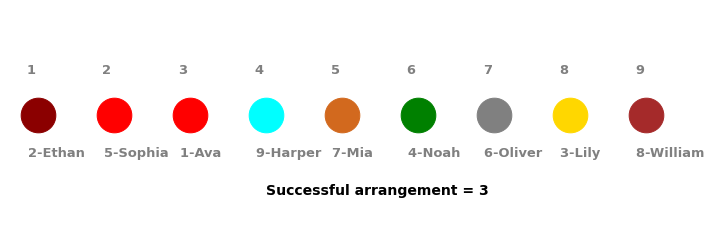

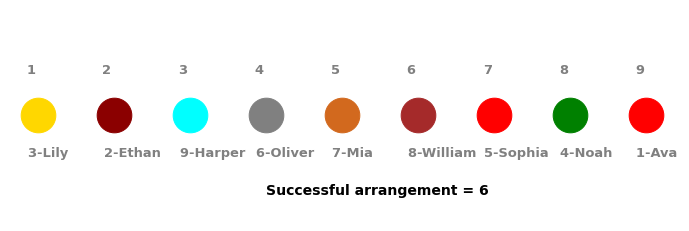

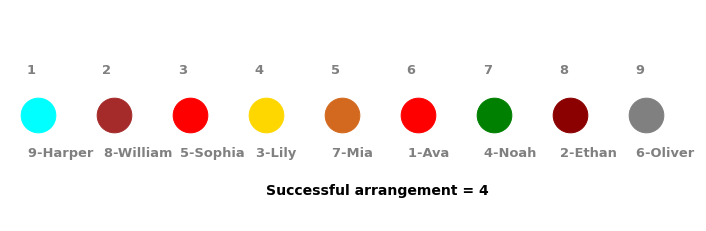

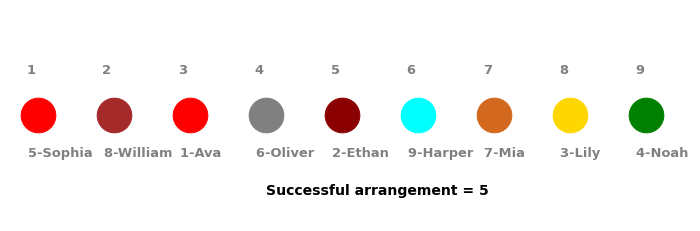

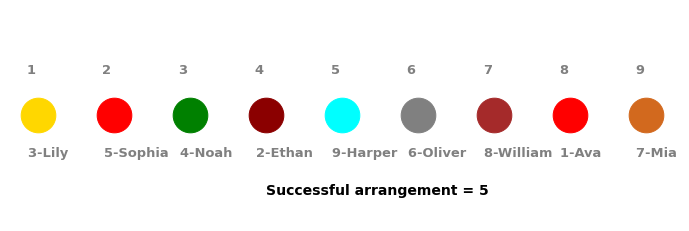

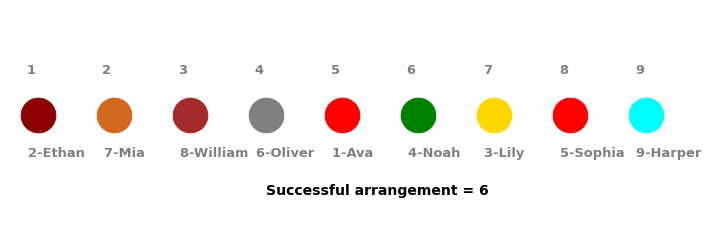

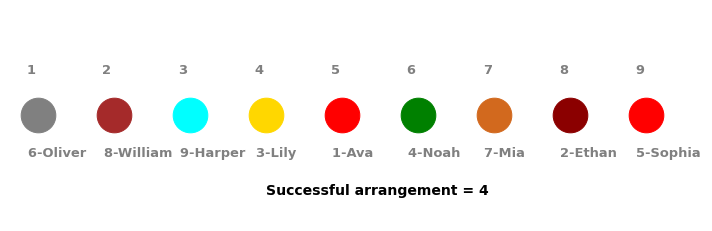

In [41]:
KOLOR = ['r', 'darkred', 'gold', 'g', 'r', 'grey','chocolate','brown','aqua','goldenrod','yellow','lightsteelblue' ]
eggs = [n for n in range(1,1+N)]

for rep in range(10):
    
    L_rand= {}
    random.shuffle(eggs)
    plt.figure(figsize=(12,4))
    for n in eggs:    
        i =1+eggs.index(n)
        L_rand[n] = i
        print(n,i)
        x0,y0 = i , 1 
        plt.scatter(x0,y0,s=1200, c = KOLOR[n-1], zorder =2)
        plt.text(x0-0.13,y0-0.021,s=str(n)+'-'+ egg_names[n-1] + ' ' , zorder =2, fontweight='bold', fontsize=13, c='grey')
        plt.text(x0-0.15,y0+0.021,s=str(i) , zorder =2, fontweight='bold', fontsize=13, c='grey')

    success = sum(1 for (n,m) in connect if abs(L_rand[n]-L_rand[m]) ==1)
    print(success)        
    plt.text(4,0.96,s='Successful arrangement = ' + str(success), zorder =2, fontweight='bold', fontsize=14, c='k')



    plt.grid()
    plt.axis('off')
    plt.savefig('Easter' + str(rep) + ' .png', format='png', dpi=400)


This is used for visualization of teh results 
which class will have the exam and when 

12


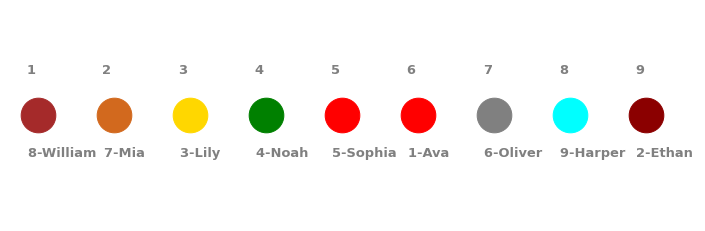

In [28]:
KOLOR = ['r', 'darkred', 'gold', 'g', 'r', 'grey','chocolate','brown','aqua','goldenrod','yellow','lightsteelblue' ]
print(len(KOLOR))
kvec = []
dvec = []
plt.figure(figsize=(12,4))
for n in instance.n:    
    for i in instance.i:
        if value(instance.U[n,i])>0:
            x0, y0  = i , 1
            plt.scatter(x0,y0,s=1200, c = KOLOR[n-1], zorder =2)
            plt.text(x0-0.13,y0-0.021,s=str(n)+'-'+ egg_names[n-1] + ' ' , zorder =2, fontweight='bold', fontsize=13, c='grey')
            plt.text(x0-0.15,y0+0.021,s=str(i) , zorder =2, fontweight='bold', fontsize=13, c='grey')


plt.grid()
plt.axis('off')
plt.savefig('Easter' + ' .png', format='png', dpi=400)


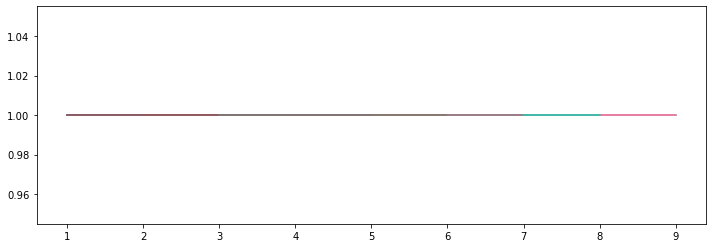

In [26]:
plt.figure(figsize=(12,4))

for (i,j) in connect:
    if value(instance.x[i,j])>0:
        x0, y0  = i , 1
        x1, y1  = j , 1
        plt.plot([x0,x1],[y0,y1])

    